In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_dados = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df_dados_numericos = df_dados[["Life expectancy ", "infant deaths", "Alcohol", "percentage expenditure", "GDP", "Hepatitis B",
                     " BMI ", "under-five deaths ", "Polio", "Total expenditure", "Diphtheria ", " HIV/AIDS",
                     " thinness  1-19 years", " thinness 5-9 years", "Income composition of resources",
                     "Schooling"]]

In [4]:
df_dados_numericos

,Life expectancy,infant deaths,Alcohol,percentage expenditure,GDP,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,62,0.01,71.279624,584.259210,65.0,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,59.9,64,0.01,73.523582,612.696514,62.0,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,59.9,66,0.01,73.219243,631.744976,64.0,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,59.5,69,0.01,78.184215,669.959000,67.0,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,59.2,71,0.01,7.097109,63.537231,68.0,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,27,4.36,0.000000,454.366654,68.0,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4,0.407,9.2
2934,44.5,26,4.06,0.000000,453.351155,7.0,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9,0.418,9.5
2935,44.8,25,4.43,0.000000,57.348340,73.0,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3,0.427,10.0
2936,45.3,25,1.72,0.000000,548.587312,76.0,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7,0.427,9.8


In [5]:
df_dados_numericos = df_dados_numericos[df_dados_numericos["Income composition of resources"] > 0]
df_dados_numericos = df_dados_numericos[df_dados_numericos["Schooling"] > 0]
df_dados_numericos = df_dados_numericos[df_dados_numericos["infant deaths"] < 900]
df_dados_numericos = df_dados_numericos[df_dados_numericos["under-five deaths "] < 900]
df_dados_numericos = df_dados_numericos[df_dados_numericos["GDP"] > 0]

In [6]:
def top_n_countries(df:pd.DataFrame, column:str, *, n:int=3) -> list[str]:
    '''df recebe um pandas dataframe que contém a coluna Country
       column recebe uma string equivalente ao dado que se quer ranquear
       n recebe um valor inteiro que indica quantos países se quer selecionar
       retorna uma lista de strings com os 5 países que possuem o maior valor médio para a coluna indicada'''

    df_mean_data = df.groupby('Country').mean()
    top_5_df_country = df_mean_data.nlargest(n, columns=column).index.to_list()
    return top_5_df_country

def bottom_n_countries(df:pd.DataFrame, column:str, *, n:int=3) -> list[str]:
    '''n recebe um valor inteiro que indica quantos países se quer selecionar
       df recebe um pandas dataframe que contém a coluna Country
       column recebe uma string equivalente ao dado que se quer ranquear
       retorna uma lista de strings com os 5 países que possuem o menor valor médio para a coluna indicada'''
    
    df_mean_data = df.groupby('Country').mean()
    bottom_5_df_country = df_mean_data.nsmallest(n, columns=column).index.to_list()
    return bottom_5_df_country

In [7]:
life_expetancy_data = df_dados[['Country', 'Year', 'Life expectancy ']]
top5_countries_lfe = top_n_countries(life_expetancy_data, 'Life expectancy ', n=3)
bottom5_countries_lfe = bottom_n_countries(life_expetancy_data, 'Life expectancy ', n=3)
dfs_lfe_top_countries = [life_expetancy_data.loc[life_expetancy_data['Country'] == country] for country in top5_countries_lfe]
dfs_lfe_bottom_countries = [life_expetancy_data.loc[life_expetancy_data['Country'] == country] for country in bottom5_countries_lfe]
filtered_life_expetancy_data = pd.concat([*dfs_lfe_top_countries, *dfs_lfe_bottom_countries], axis=0)

In [8]:
alcohol_consumption_data = df_dados[['Country', 'Year', 'Alcohol']]
alcohol_consumption_data = alcohol_consumption_data[alcohol_consumption_data['Alcohol'] >= 1]
top5_countries_alc = top_n_countries(alcohol_consumption_data, 'Alcohol', n=3)
bottom5_countries_alc = bottom_n_countries(alcohol_consumption_data, 'Alcohol', n=3)
dfs_alc_top_countries = [alcohol_consumption_data.loc[alcohol_consumption_data['Country'] == country] for country in top5_countries_alc]
dfs_alc_bottom_countries = [alcohol_consumption_data.loc[alcohol_consumption_data['Country'] == country] for country in bottom5_countries_alc]
filtered_alcohol_consumption_data = pd.concat([*dfs_alc_top_countries, *dfs_alc_bottom_countries], axis=0)

In [9]:
income_composition_data = df_dados[['Country', 'Year', 'Income composition of resources']]
top5_countries_inc_comp = top_n_countries(income_composition_data, 'Income composition of resources', n=3)
bottom5_countries_inc_comp = bottom_n_countries(income_composition_data, 'Income composition of resources', n=3)
dfs_inc_comp_top_countries = [income_composition_data.loc[income_composition_data['Country'] == country] for country in top5_countries_inc_comp]
dfs_inc_comp_bottom_countries = [income_composition_data.loc[income_composition_data['Country'] == country] for country in bottom5_countries_inc_comp]
filtered_income_composition_data = pd.concat([*dfs_inc_comp_top_countries, *dfs_inc_comp_bottom_countries], axis=0)

# Gráficos de Dispersão

<AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>

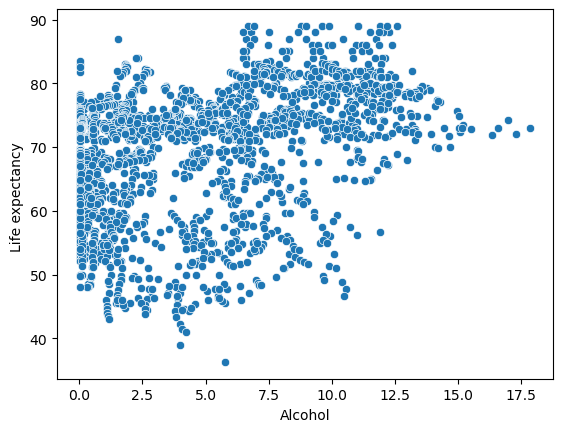

In [10]:
sns.scatterplot(data = df_dados_numericos, x = "Alcohol", y = "Life expectancy ")

<AxesSubplot:xlabel='Alcohol', ylabel='Income composition of resources'>

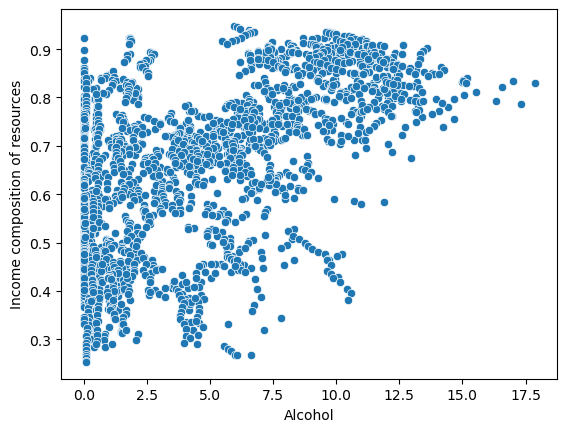

In [11]:
sns.scatterplot(data = df_dados_numericos, x = "Alcohol", y = "Income composition of resources") 

<AxesSubplot:xlabel='Life expectancy ', ylabel='Income composition of resources'>

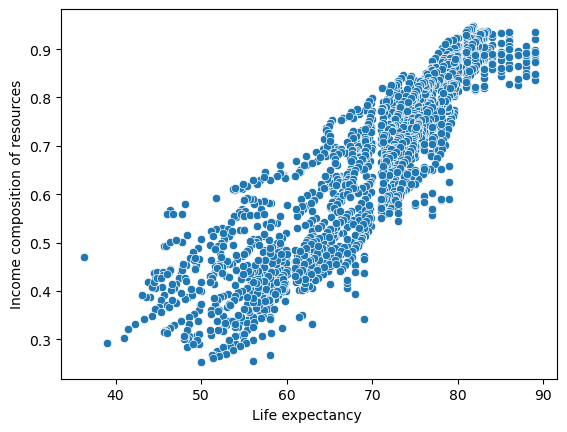

In [12]:
sns.scatterplot(data = df_dados_numericos, x = "Life expectancy ", y = "Income composition of resources")

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

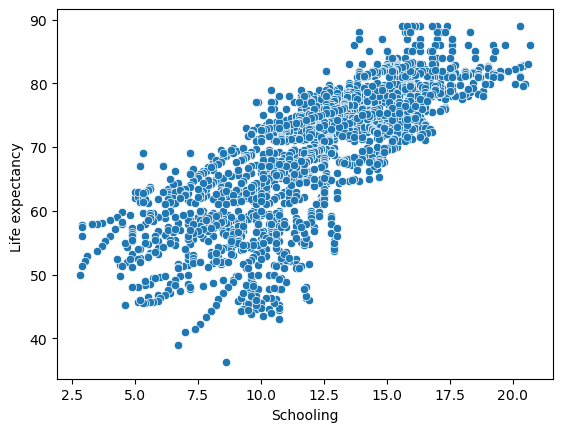

In [13]:
sns.scatterplot(data = df_dados_numericos, x = "Schooling", y = "Life expectancy ") 

<AxesSubplot:xlabel='Schooling', ylabel='Income composition of resources'>

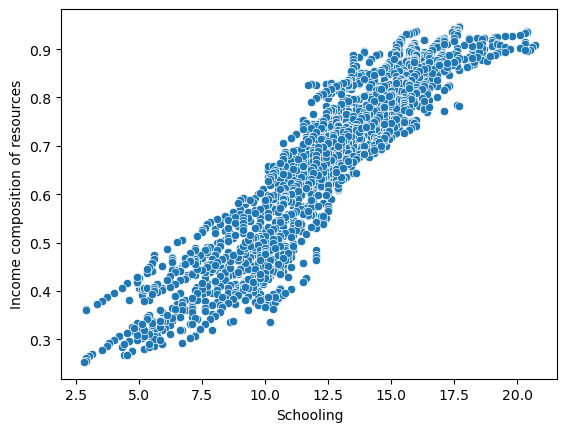

In [14]:
sns.scatterplot(data = df_dados_numericos, x = "Schooling", y = "Income composition of resources")

<AxesSubplot:xlabel=' BMI ', ylabel='infant deaths'>

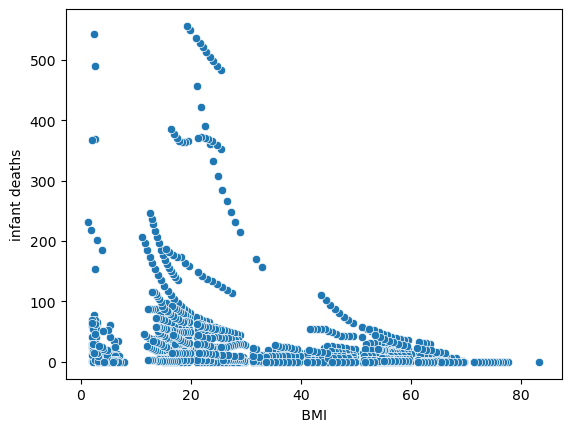

In [15]:
sns.scatterplot(data = df_dados_numericos, x = " BMI ", y = "infant deaths") 

<AxesSubplot:xlabel=' BMI ', ylabel='under-five deaths '>

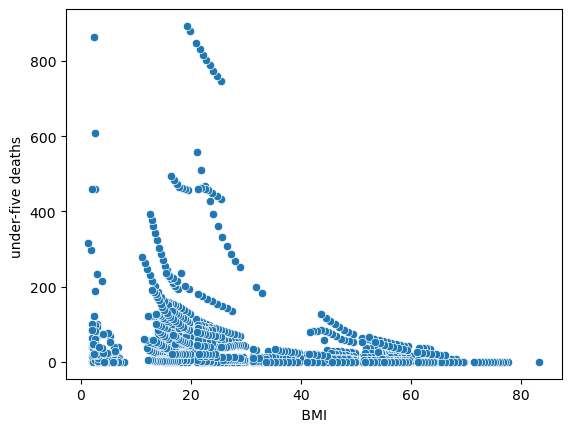

In [16]:
sns.scatterplot(data = df_dados_numericos, x = " BMI ", y = "under-five deaths ") 

<AxesSubplot:xlabel='Total expenditure', ylabel='GDP'>

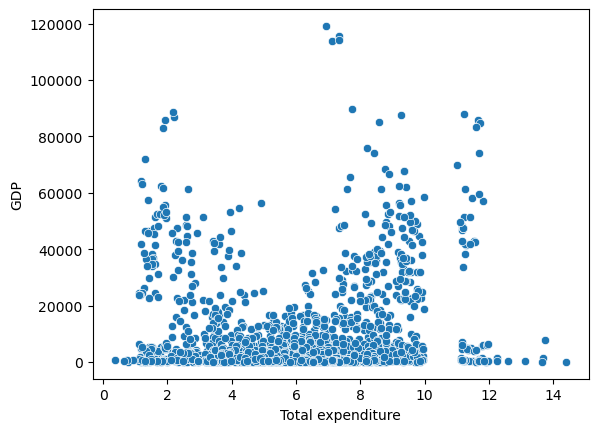

In [17]:
sns.scatterplot(data = df_dados_numericos, x = "Total expenditure", y = "GDP") 

# Histogramas

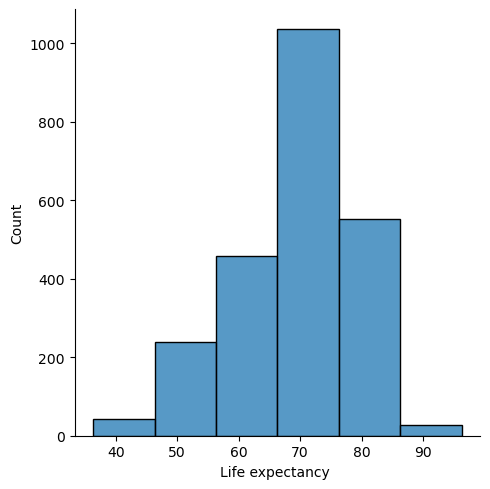

In [18]:
sns.displot(df_dados_numericos, x = "Life expectancy ", binwidth=10)

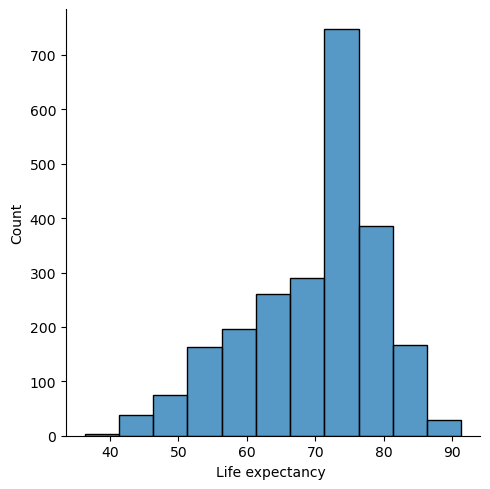

In [19]:
sns.displot(df_dados_numericos, x = "Life expectancy ", binwidth=5)

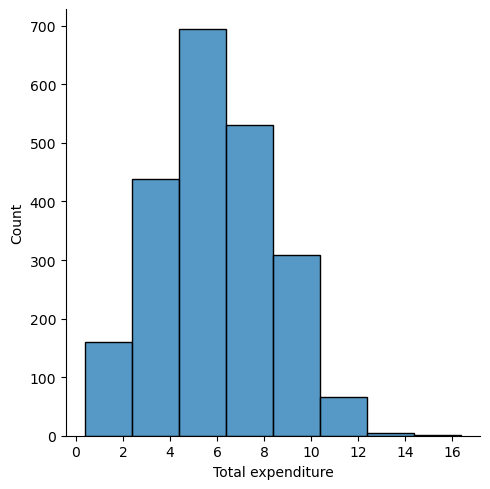

In [20]:
sns.displot(df_dados_numericos, x = "Total expenditure", binwidth = 2)

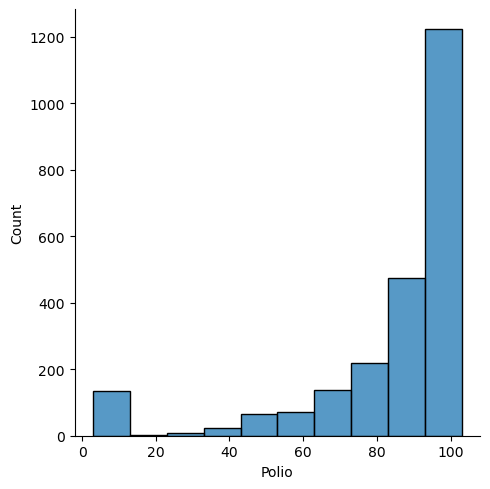

In [21]:
sns.displot(df_dados_numericos, x = "Polio", binwidth = 10)

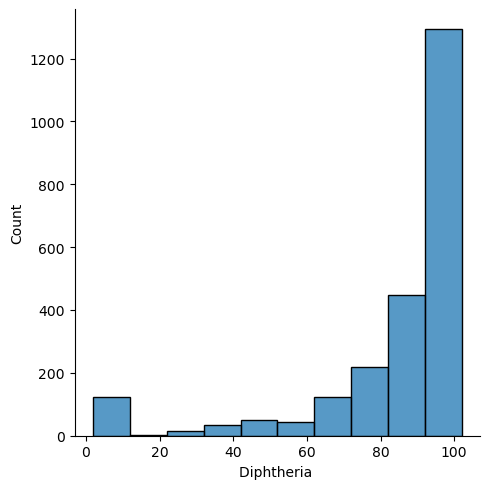

In [22]:
sns.displot(df_dados_numericos, x = "Diphtheria ", binwidth = 10)

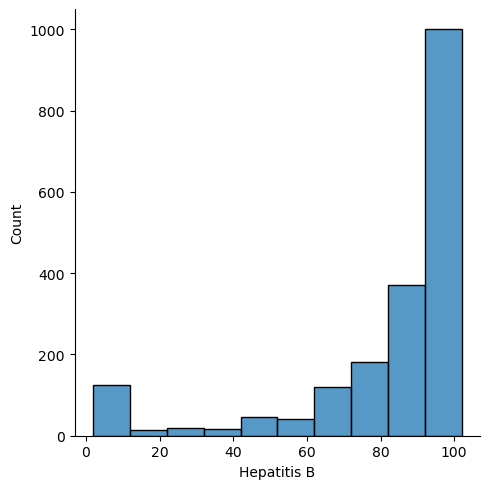

In [23]:
sns.displot(df_dados_numericos, x = "Hepatitis B", binwidth = 10)

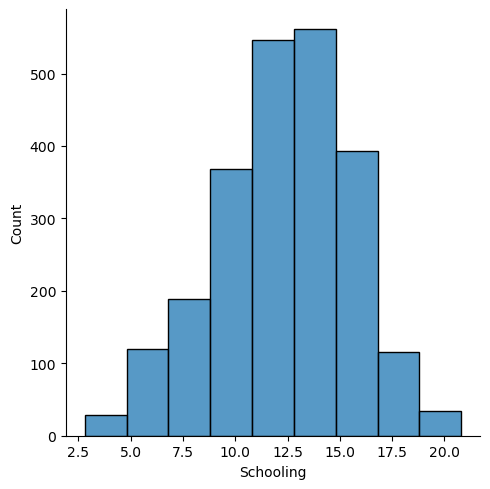

In [24]:
sns.displot(df_dados_numericos, x = "Schooling", binwidth = 2)

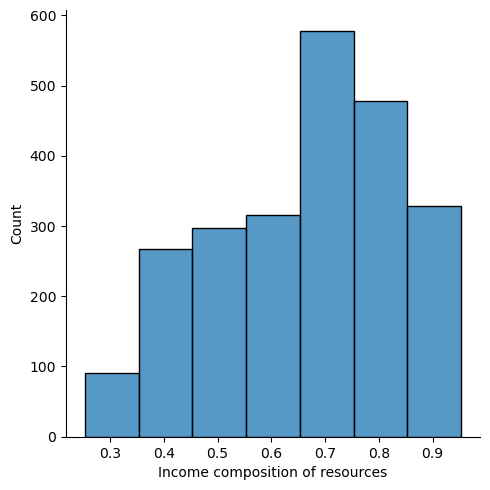

In [25]:
sns.displot(df_dados_numericos, x = "Income composition of resources", binwidth = 0.1)

# Gráficos de linha

<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>

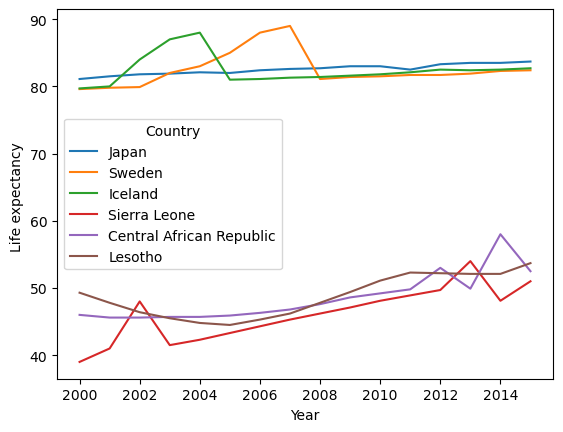

In [26]:
sns.lineplot(data=filtered_life_expetancy_data, x='Year', y='Life expectancy ', hue='Country')

<AxesSubplot:xlabel='Year', ylabel='Alcohol'>

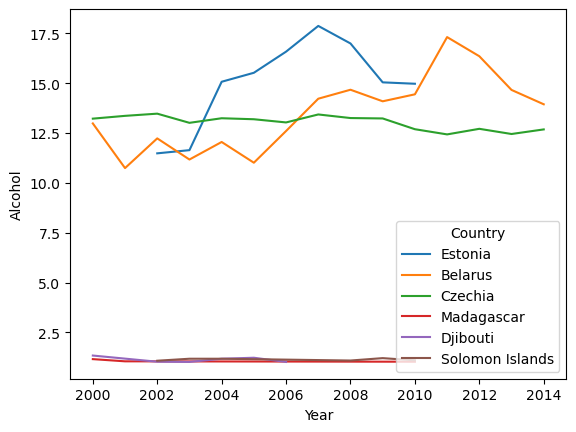

In [27]:
sns.lineplot(data=filtered_alcohol_consumption_data, x='Year', y='Alcohol', hue='Country')

<AxesSubplot:xlabel='Year', ylabel='Income composition of resources'>

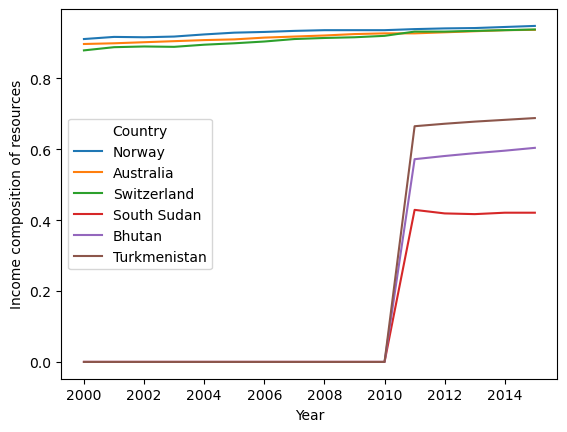

In [28]:
sns.lineplot(data=filtered_income_composition_data, x='Year', y='Income composition of resources', hue='Country')